In [1]:
using Plots
using IJulia

gr() # Plots.GRBackend()

Plots.GRBackend()

In [2]:
mutable struct Vehicle
    P::Array{Float64,2}
    θ::Float64
    L::Float64
    W::Float64
    function Vehicle(x, y, θ, L, W)
        new([x y], θ, L, W)
    end
end

In [3]:
vehicle = Vehicle(1,5,0,2.5,1)

Vehicle([1.0 5.0], 0.0, 2.5, 1.0)

In [4]:
vehicle.P[2]

5.0

In [5]:
function plotVehicle(ve::Vehicle)
    Rot(θ) = [cos(θ) -sin(θ); sin(θ) cos(θ)];
    points = [-ve.L/2 +ve.W/2;
              +ve.L/2 +ve.W/2
              +ve.L/2 -ve.W/2;
              -ve.L/2 -ve.W/2;]
    # rotate
    points = points * Rot(ve.θ)'
    # translate
    points += [ve.P[1]*ones(size(points)[1]) ve.P[2]*ones(size(points)[1])]

    contour = vcat(points, [points[1,1] points[1,2]])
    plot!(contour[:,1], contour[:,2])
    plot!(contour[2:3,1], contour[2:3,2], c=:red)
end

plotVehicle (generic function with 1 method)

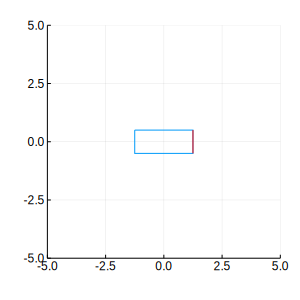

In [7]:
plot()
vehicle = Vehicle(0,0,0,2.5,1)
plotVehicle(vehicle)
plot!(lims = (-5, 5), size = (300,300), aspect_ratio=:equal, legend = false)

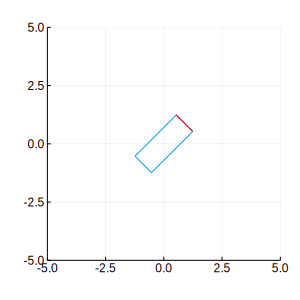

In [6]:
plot()
vehicle = Vehicle(0,0,π/4,2.5,1)
plotVehicle(vehicle)
plot!(lims = (-5, 5), size = (300,300), aspect_ratio=:equal, legend = false)

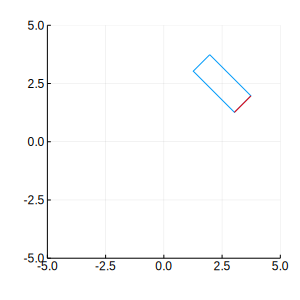

In [9]:
plot()
vehicle = Vehicle(2.5,2.5,-π/4,2.5,1)
plotVehicle(vehicle)
plot!(lims = (-5, 5), size = (300,300), aspect_ratio=:equal, legend = false)

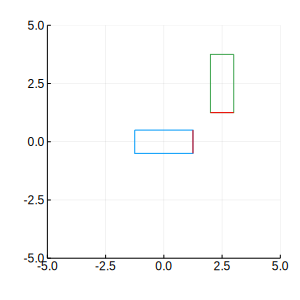

In [10]:
plot()
vehicle1 = Vehicle(0,0,0,2.5,1)
vehicle2 = Vehicle(2.5,2.5,-π/2,2.5,1)
plotVehicle(vehicle1)
plotVehicle(vehicle2)
plot!(lims = (-5, 5), size = (300,300), aspect_ratio=:equal, legend = false)

In [11]:
function updateVehicle(ve::Vehicle, s::Float64, θ::Float64)
    # y = rot*x
    # y = x*rot'
    Rot(θ) = [cos(θ) -sin(θ); sin(θ) cos(θ)];
    d = s*[cos(ve.θ) sin(ve.θ)]
    d = d*Rot(θ)'
    ve.P += d
    ve.θ += θ
end

updateVehicle (generic function with 1 method)

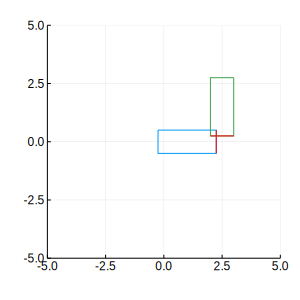

In [12]:
plot()
updateVehicle(vehicle1, 1.0, 0.0)
updateVehicle(vehicle2, 1.0, 0.0)
plotVehicle(vehicle1)
plotVehicle(vehicle2)
plot!(lims = (-5, 5), size = (300,300), aspect_ratio=:equal, legend = false)

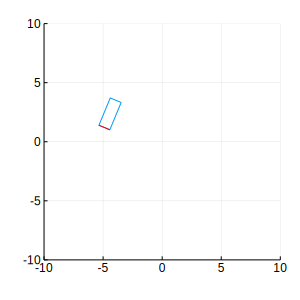

In [13]:
plot()
vehicle = Vehicle(0,0,1*π/4,2.5,1)
for ii in 1:50
    updateVehicle(vehicle, 0.5, 1*π/16)
    plot()
    plotVehicle(vehicle)
    plot!(lims = (-10, 10), size = (300,300), aspect_ratio=:equal, legend = false) |> IJulia.display
    IJulia.clear_output(true)
    sleep(0.2)
end

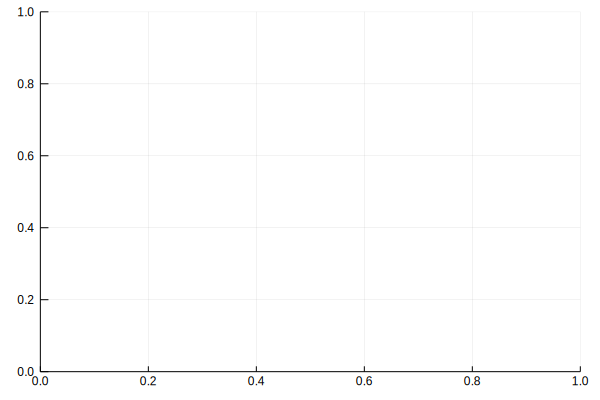

In [120]:
plot()